In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("mnist_test.csv")


0


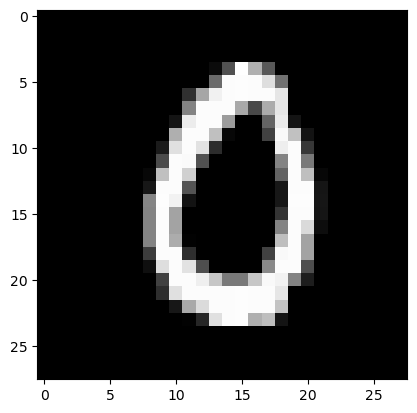

In [2]:
x= df.drop('label',axis=1 )
y=df['label']
index = 1001
k = x.iloc[index].values.reshape(28,28)
print(y[index])
plt.imshow(k,cmap='gray')
plt.show()

In [3]:
x = x / 255
x_train,x_test , y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [4]:
type(x_test)

pandas.core.frame.DataFrame

In [5]:
x_train.shape

(8000, 784)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential([
    Flatten(input_shape=(28 * 28,)),  # Flatten input to a 1D vector (28x28 pixels)
    Dense(128, activation='relu'),    # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')   # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7351 - loss: 0.9372 - val_accuracy: 0.9105 - val_loss: 0.3140
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9300 - loss: 0.2449 - val_accuracy: 0.9260 - val_loss: 0.2519
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9457 - loss: 0.1861 - val_accuracy: 0.9320 - val_loss: 0.2246
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9605 - loss: 0.1381 - val_accuracy: 0.9430 - val_loss: 0.2005
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9732 - loss: 0.0993 - val_accuracy: 0.9460 - val_loss: 0.1922
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9804 - loss: 0.0800 - val_accuracy: 0.9505 - val_loss: 0.1825
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9868 - loss: 0.0565 - val_accuracy: 0.9525 - val_loss: 0.1776
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9938 - loss: 0.0373 - val_accuracy: 0.

In [8]:

index = 202 # Choose the index of the image to test

# Get the image from x_test and reshape it to (28, 28, 1) (28x28 pixels with 1 channel)
img = x_test.iloc[index]                 # Reshape to 28x28 with 1 channel

# Predict the label
prediction = model.predict(np.expand_dims(img, axis=0))  # Add a batch dimension
xyz = []
guess = []
for i in range(10,800):
    img = x.iloc[i]
    prediction = model.predict(np.expand_dims(img, axis=0)) 
    if np.argmax(prediction) <= 0.10:
        xyz.append(i) 
        guess.append(np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [ ]:
print(xyz)
print(guess)

[10, 13, 25, 28, 33, 55, 69, 71, 101, 126, 136, 148, 157, 183, 188, 192, 194, 215, 246, 259, 269, 271, 294, 296, 297, 305, 311, 312, 324, 327, 346, 365, 372, 380, 407, 424, 440, 441, 443, 459, 485, 490, 498, 525, 545, 546, 561, 564, 567, 581, 586, 592, 597, 608, 611, 620, 642, 644, 656, 661, 701, 704, 713, 717, 721, 723, 742, 750, 763, 794]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [36]:
x.iloc[13]

1x1      0.0
1x2      0.0
1x3      0.0
1x4      0.0
1x5      0.0
        ... 
28x24    0.0
28x25    0.0
28x26    0.0
28x27    0.0
28x28    0.0
Name: 13, Length: 784, dtype: float64